In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [34]:
df=pd.read_csv("data/survey.csv")

In [35]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### UNDERSTANDING THE COLUMNS
* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [37]:
#Number of missing values in each columns
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [38]:
#Irrelevant columns: columns that play no role in prediction and are better off dropped
df=df.drop(columns=["Timestamp", "comments"], axis=1)
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [39]:
df["Country"].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [40]:
df["state"].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

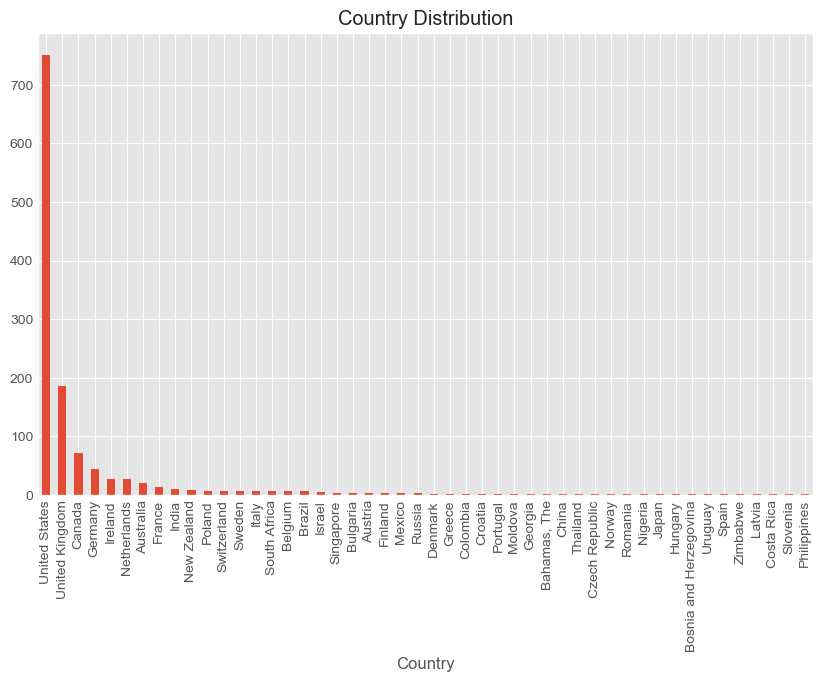

In [41]:
fig, ax =plt.subplots(figsize=(10,6))
df["Country"].value_counts().plot(kind="bar",ax=ax)
ax.set(title="Country Distribution")
plt.show()

In [42]:
#Its pretty pointless to consider country as something that affects mental health. And since states are only US states, its better to drop both columns.
df=df.drop(columns=["Country", "state"], axis=1)

In [43]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [44]:
#Age and Gender Column analysis
print(f"The ages are distributed as follows: \n\n{df["Age"].unique()}")
print("\n \n \n")
print(f"The genders are distributed as follows \n\n: {df["Gender"].unique()}")

The ages are distributed as follows: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 
 

The genders are distributed as follows 

: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 

#### It is obvious that some of the survey answers for 'Age' are outright false
#### The gender system can also be changed to 'Male', 'Female' and 'Other' to get a better basis 

In [45]:
df=df.drop(df[df["Age"]<0].index)
df=df.drop(df[df["Age"]>100].index)
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [46]:
df["Gender"]=df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male')

df["Gender"]=df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female')

df["Gender"]=df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other')

df['Gender'].value_counts()

Gender
Male      988
Female    247
Other      19
Name: count, dtype: int64

In [47]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


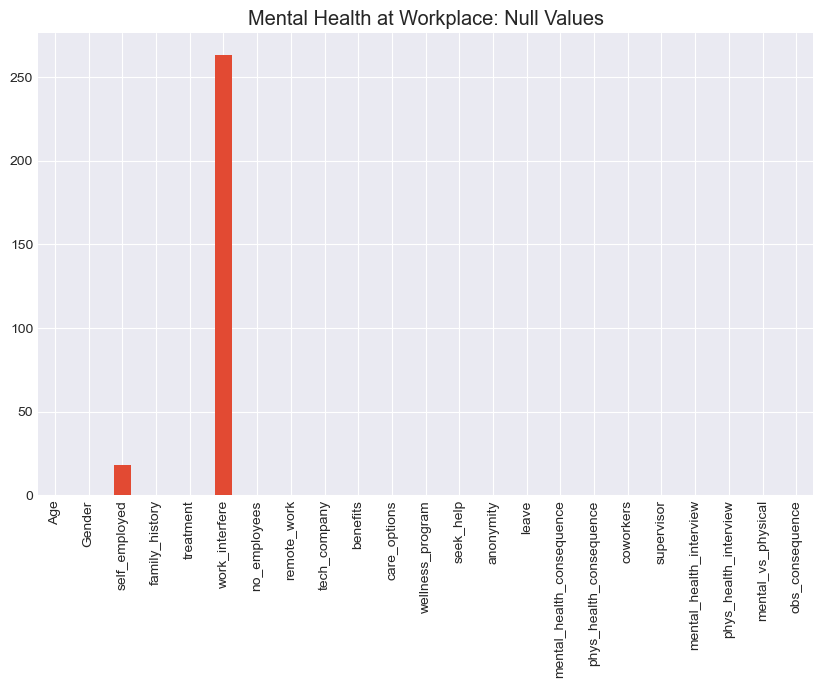

In [48]:
plt.style.use("seaborn-v0_8-darkgrid")
null_vals=df.isna().sum()
fig, ax=plt.subplots(figsize=(10,6))
null_vals.plot(kind="bar",ax=ax)
ax.set(title="Mental Health at Workplace: Null Values");

#### Now, we have null values in self_employed and work_interfere. It is objectively better to impute these values now itself

In [49]:
df["work_interfere"].value_counts(dropna=False),  df["self_employed"].value_counts(dropna=False)

(work_interfere
 Sometimes    464
 NaN          263
 Never        213
 Rarely       173
 Often        141
 Name: count, dtype: int64,
 self_employed
 No     1092
 Yes     144
 NaN      18
 Name: count, dtype: int64)

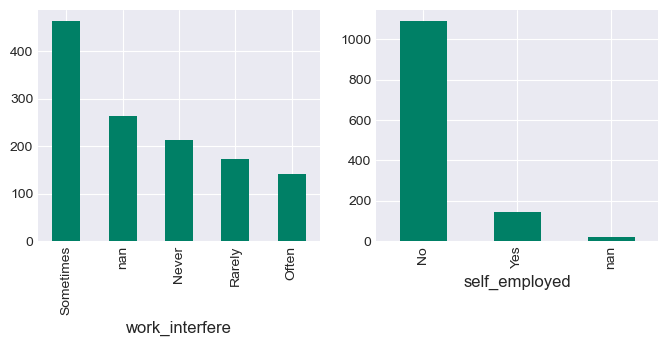

In [50]:
#Value Count Analysis of Null Valued Columns
plt.style.use("petroff10")
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
df["work_interfere"].value_counts(dropna=False).plot(kind="bar", cmap="summer", ax=ax1);
df["self_employed"].value_counts(dropna=False).plot(kind="bar", cmap="summer", ax=ax2);
plt.show()

* In the self employed column, it's obvious that NaN values are very few. So we can impute this column using the 'mode' stratergy
* In the work_interfere column, the NaN values are high, so we can fill it with a different category altogether, say 'Unknown'
#### Note: imputing is always done after the train-test data split so as to avoid data leakage. However, since both the filling stratergies being used are non-numerical, we can impute now.

In [51]:
#Imputing 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

mode_features=["self_employed"]
work_features=["work_interfere"]

mode_imputer=SimpleImputer(strategy="most_frequent")
work_imputer=SimpleImputer(strategy="constant", fill_value="Unknown")

transform=ColumnTransformer([("mode_imputer", mode_imputer, mode_features),("work_imputer", work_imputer, work_features)],remainder="passthrough")
transformed_dataset=transform.fit_transform(df)

In [52]:
transformed_df = pd.DataFrame(
    transformed_dataset,
    columns=[col.split("__")[-1] for col in transform.get_feature_names_out()]
)

In [53]:
transformed_df.head()

,self_employed,work_interfere,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,No,Often,37,Female,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,No,Rarely,44,Male,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,No,Rarely,32,Male,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,No,Often,31,Male,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,Never,31,Male,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [54]:
transformed_df.isna().sum()
#Finally, no more missing values

self_employed                0
work_interfere               0
Age                          0
Gender                       0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# EDA(Exploratory Data Analysis)

Our target variable/dependent variable is 'treatment', which shows whether the person has sought treatment or not

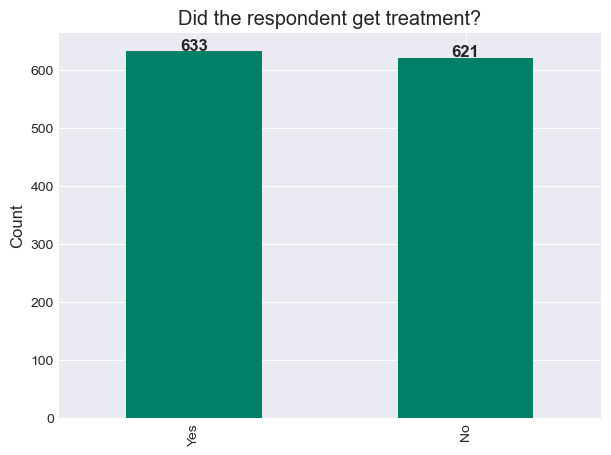

In [55]:
plt.style.use("seaborn-v0_8-darkgrid")
fig, ax=plt.subplots(figsize=(7,5))
bars=transformed_df["treatment"].value_counts().plot(kind="bar", ax=ax, cmap="summer")
ax.set(ylabel="Count", title="Did the respondent get treatment?",xlabel=None)

for p in bars.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,    # x: center of the bar
        p.get_height() + 2,               # y: slightly above the top
        int(p.get_height()),              # label: bar height as int
        ha='center', fontsize=12, weight='bold'
    )

    
plt.show()

#### This shows that our dataset is almost evenly split into two parts, people who get treatment, and people who don't

* Now, we should explore the feature variables and figure out how they influence whether a person gets treatment or not
* Ensuring healthy mental state is crucial for a workspace as it allows more productivity, benefiting both the emmployer and employee 

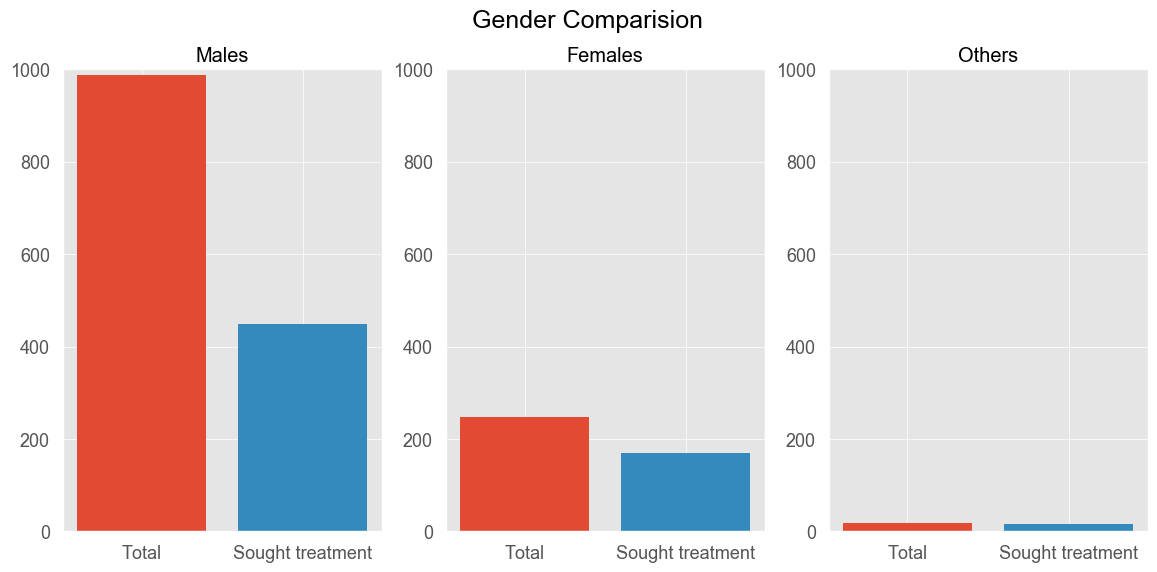

In [243]:
males=transformed_df[transformed_df["Gender"]=="Male"]
treated_males=males[males["treatment"]=="Yes"]

females=transformed_df[transformed_df["Gender"]=="Female"]
treated_females=females[females["treatment"]=="Yes"]

others=transformed_df[transformed_df["Gender"]=="Other"]
treated_others=others[others["treatment"]=="Yes"]
plt.style.use("ggplot")

fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(14,6), sharex=False, sharey=False)
plt.suptitle("Gender Comparision", fontsize=18, fontweight=12)
ax1.bar("Total", len(males))
ax1.bar("Sought treatment", len(treated_males))
ax2.bar("Total", len(females))
ax2.bar("Sought treatment", len(treated_females))
ax1.set(title="Males")
ax2.set(title="Females")
ax3.bar("Total",len(others))
ax3.bar("Sought treatment", len(treated_others))
ax3.set(title="Others")

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 1000])


ax2.bar
plt.show()

The `gender` feature helps us to analyse whether gender has a role in seeking treatment

* It's obvious that the number of men are far more than the number of women and others
* However, we can see that the ratio of women and others that undergo treatment are far higher than the ratio of men

### Hence, gender appears to influence the likelihood of whether a person may seek mental health treatment or not, where males are more likely to avoid seeking treatment than females or others

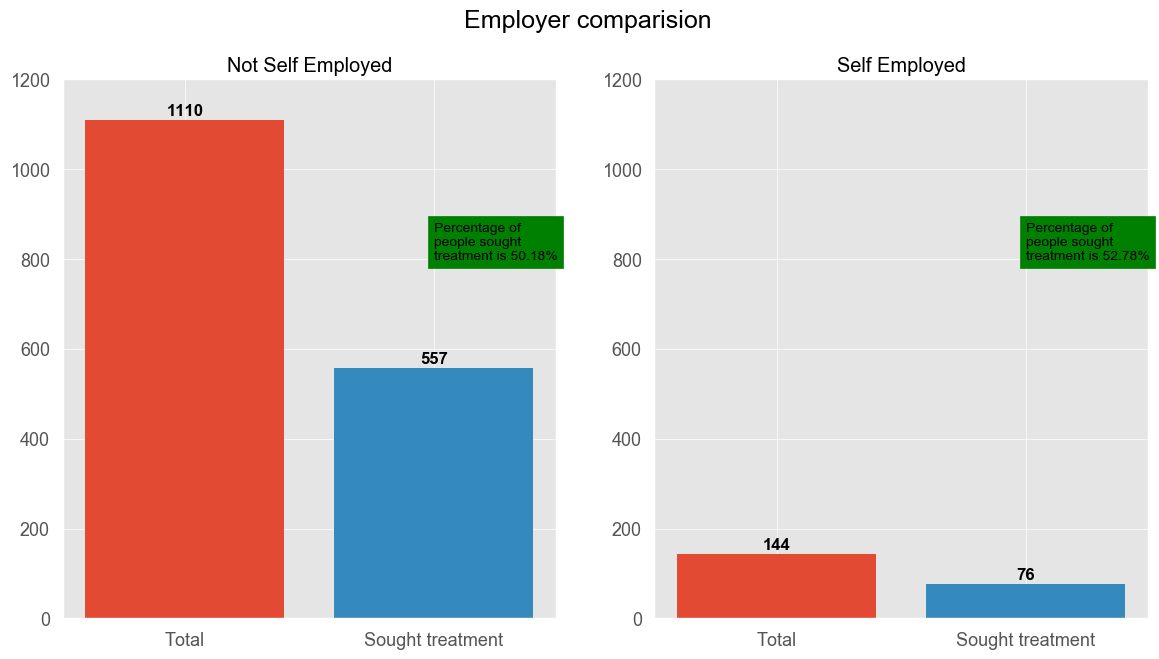

In [244]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
not_self_employed=transformed_df[transformed_df["self_employed"]=="No"]
self_employed=transformed_df[transformed_df["self_employed"]=="Yes"]

ax1.bar("Total", len(not_self_employed))
ax1.bar("Sought treatment", len(not_self_employed[not_self_employed["treatment"]=="Yes"]))

ax2.bar("Total", len(self_employed))
ax2.bar("Sought treatment", len(self_employed[self_employed["treatment"]=="Yes"]))

for ax in [ax1, ax2]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )
ax1.set(title="Not Self Employed")
ax2.set(title="Self Employed")
ax1.text("Sought treatment", 800, f"Percentage of \npeople sought \ntreatment is {(557/1110)*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 800, f"Percentage of \npeople sought \ntreatment is {(76/144)*100:.2f}%",backgroundcolor="green")
for ax in [ax1, ax2]:
    ax.set_ylim([0, 1200])


plt.suptitle("Employer comparision", fontsize=18, fontweight=12)
plt.show()

The `self_employed` feature helps us to find whether a person is more likely to undergo treatment if they are/aren't self employed

* Majority of the survey respondents are not employed
* However, the percentage or ratio of the people who undergo treatment in both of these categories are more or less the same(around half undergo treatment)

### Hence, self employment does not largely affect whether our a survey respondent will be seeking out medical attention or not

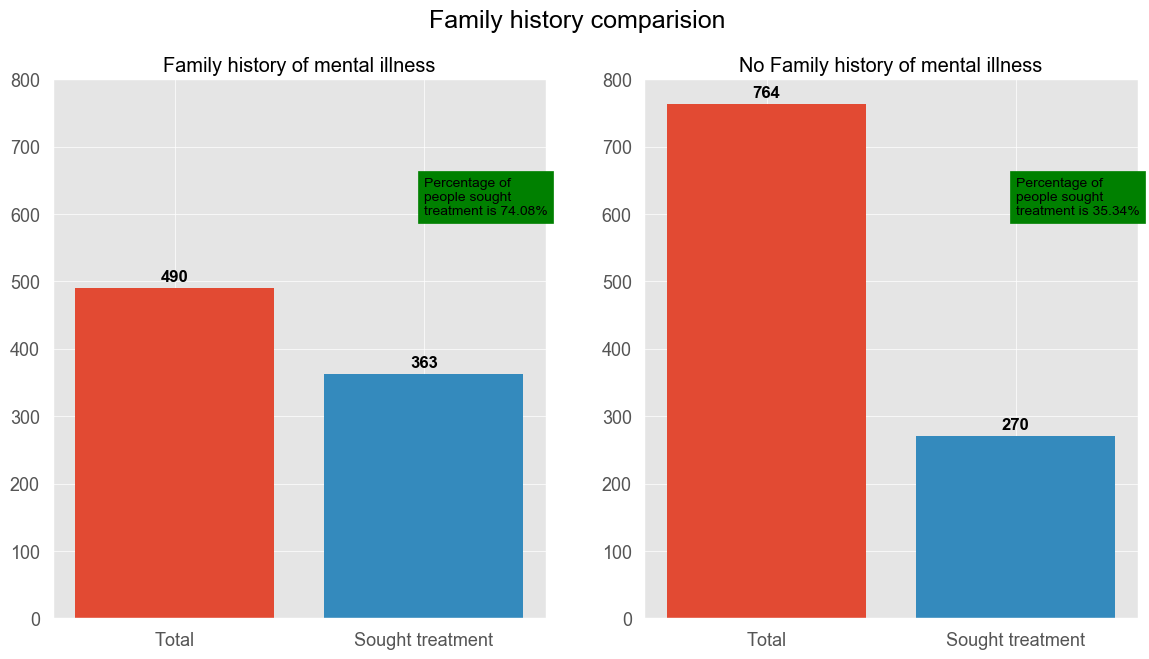

In [245]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
for ax in [ax1, ax2]:
    ax.set_ylim([0, 800])

family_yes=transformed_df[transformed_df["family_history"]=="Yes"]
family_no=transformed_df[transformed_df["family_history"]=="No"]

treated_yes=family_yes[family_yes["treatment"]=="Yes"]
treated_no=family_no[family_no["treatment"]=="Yes"]

ax1.bar("Total", len(family_yes))
ax1.bar("Sought treatment", len(family_yes[family_yes["treatment"]=="Yes"]))

ax2.bar("Total", len(family_no))
ax2.bar("Sought treatment", len(family_no[family_no["treatment"]=="Yes"]))

for ax in [ax1, ax2]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )
ax1.set(title="Family history of mental illness")
ax2.set(title="No Family history of mental illness")

ax1.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(family_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(family_no))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Family history comparision", fontsize=18, fontweight=12)
plt.show()

The `family_history` feature helps us to analyse whether a person is more likely to go seek medical help if their family has a history of mental illnesses

* Looking at the data, it's obvious that families with a history of mental illnesses are more likely to see medical help

### Thus, family history is an important factor that has to be taken into consideration as it influences the behaviour of employees a lot

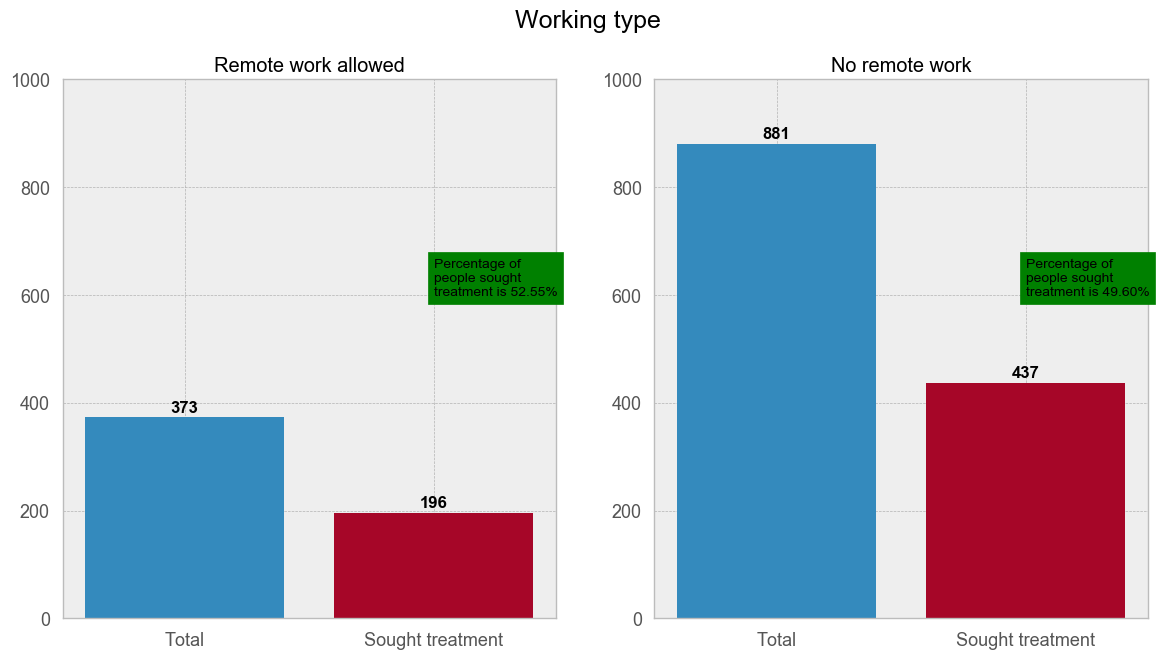

In [246]:
plt.style.use("bmh")
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
for ax in [ax1, ax2]:
    ax.set_ylim([0, 1000])

remote_yes=transformed_df[transformed_df["remote_work"]=="Yes"]
remote_no=transformed_df[transformed_df["remote_work"]=="No"]

treated_yes=remote_yes[remote_yes["treatment"]=="Yes"]
treated_no=remote_no[remote_no["treatment"]=="Yes"]

ax1.bar("Total", len(remote_yes))
ax1.bar("Sought treatment", len(remote_yes[remote_yes["treatment"]=="Yes"]))

ax2.bar("Total", len(remote_no))
ax2.bar("Sought treatment", len(remote_no[remote_no["treatment"]=="Yes"]))

for ax in [ax1, ax2]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )
ax1.set(title="Remote work allowed")
ax2.set(title="No remote work")

ax1.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(remote_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(remote_no))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Working type", fontsize=18, fontweight=12)
plt.show()


The `remote_work` feature allows us to find out whether working remotely has any corelation to seeking out mental health

* Almost 70% of the people don't get remote work, however, we can see that almost the same ratio of people exist in both categories that actually seek help

### Hence, we can conclude that the remote work feature does not really play a huge role to find out the target variable

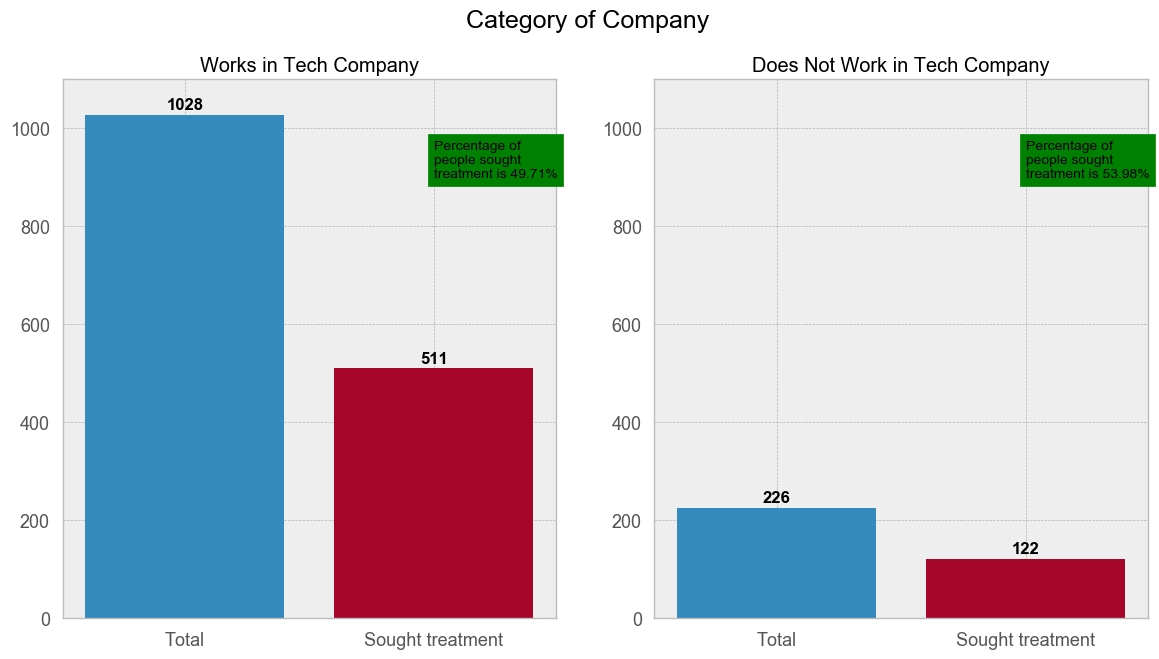

In [247]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
for ax in [ax1, ax2]:
    ax.set_ylim([0, 1100])

tech_yes=transformed_df[transformed_df["tech_company"]=="Yes"]
tech_no=transformed_df[transformed_df["tech_company"]=="No"]

treated_yes=tech_yes[tech_yes["treatment"]=="Yes"]
treated_no=tech_no[tech_no["treatment"]=="Yes"]

ax1.bar("Total", len(tech_yes))
ax1.bar("Sought treatment", len(tech_yes[tech_yes["treatment"]=="Yes"]))

ax2.bar("Total", len(tech_no))
ax2.bar("Sought treatment", len(tech_no[tech_no["treatment"]=="Yes"]))

for ax in [ax1, ax2]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )
ax1.set(title="Works in Tech Company")
ax2.set(title="Does Not Work in Tech Company")

ax1.text("Sought treatment", 900, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(tech_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 900, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(tech_no))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Category of Company", fontsize=18, fontweight=12)
plt.show()


Although the survey is originally for tech employees only, it is pretty evident that some non-tech company respondents are also here, hence the `tech_company` feature

* It is pretty obvious that most of the respondents in this survey belong to a tech company.
* We can see that mental health is an issue, in both tech and non tech companies alike.
* However, there is a very small difference and the number of people who undergo treatment in the tech sector is slightly lower

### Hence, it might be safe to conclude that this feature is not that big of a deal and won't affect the target column severely

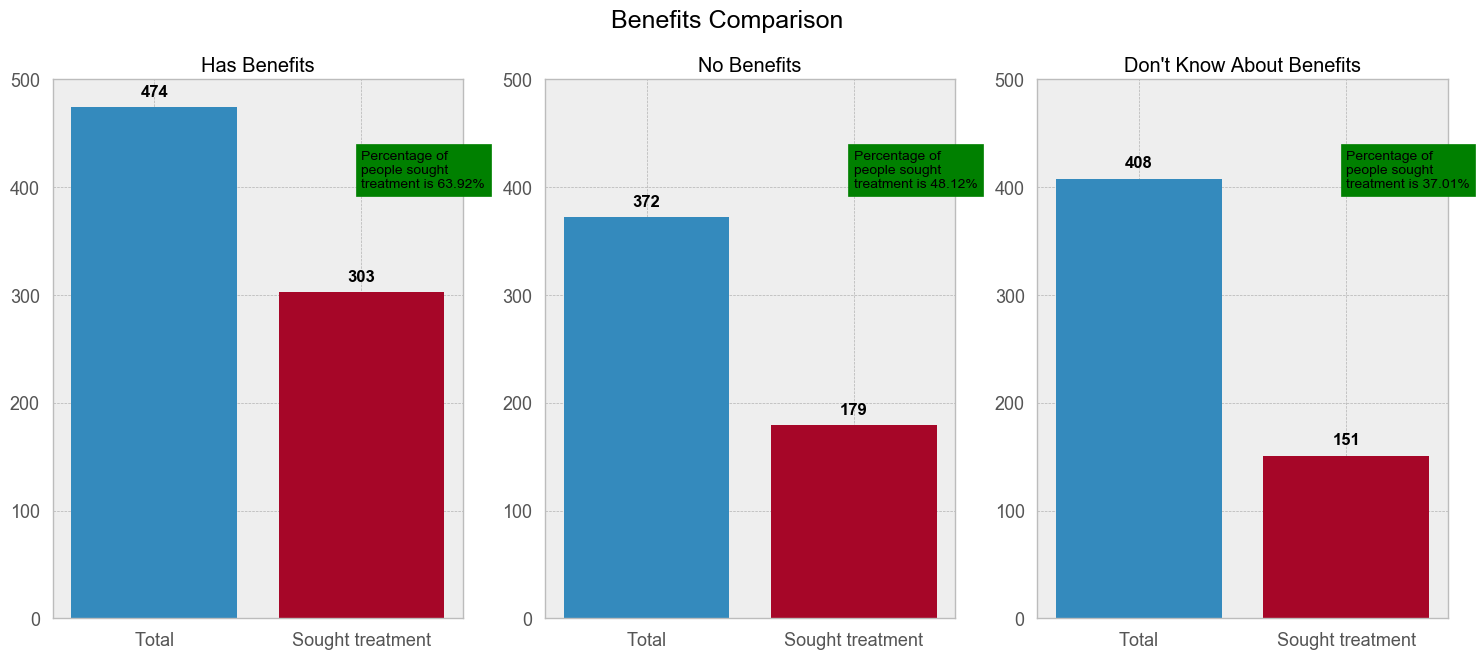

In [248]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 500])

benefit_yes=transformed_df[transformed_df["benefits"]=="Yes"]
benefit_no=transformed_df[transformed_df["benefits"]=="No"]
benefit_dk=transformed_df[transformed_df["benefits"]=="Don't know"]

treated_yes=benefit_yes[benefit_yes["treatment"]=="Yes"]
treated_no=benefit_no[benefit_no["treatment"]=="Yes"]
treated_dk=benefit_dk[benefit_dk["treatment"]=="Yes"]

ax1.bar("Total", len(benefit_yes))
ax1.bar("Sought treatment", len(treated_yes))

ax2.bar("Total", len(benefit_no))
ax2.bar("Sought treatment", len(treated_no))

ax3.bar("Total", len(benefit_dk))
ax3.bar("Sought treatment", len(treated_dk))

for ax in [ax1, ax2, ax3]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Has Benefits")
ax2.set(title="No Benefits")
ax3.set(title="Don't Know About Benefits")

ax1.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(benefit_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(benefit_no))*100:.2f}%",backgroundcolor="green")
ax3.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_dk)/len(benefit_dk))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Benefits Comparison", fontsize=18, fontweight=12)
plt.show()


The feature `benefits` answers the question whether the employer of the survey respondents provide health benefits or not

* Surprisingly, around 32% people did not know whether the workplace offers such benefits
* On the other hand, 64% of people who do have benefits actually undergo treatment, whereas 48% who don't, do not undergo treatment

### Hence, it can be concluded that people are more likely to undergo treatment if their company provides them with mental health benefits

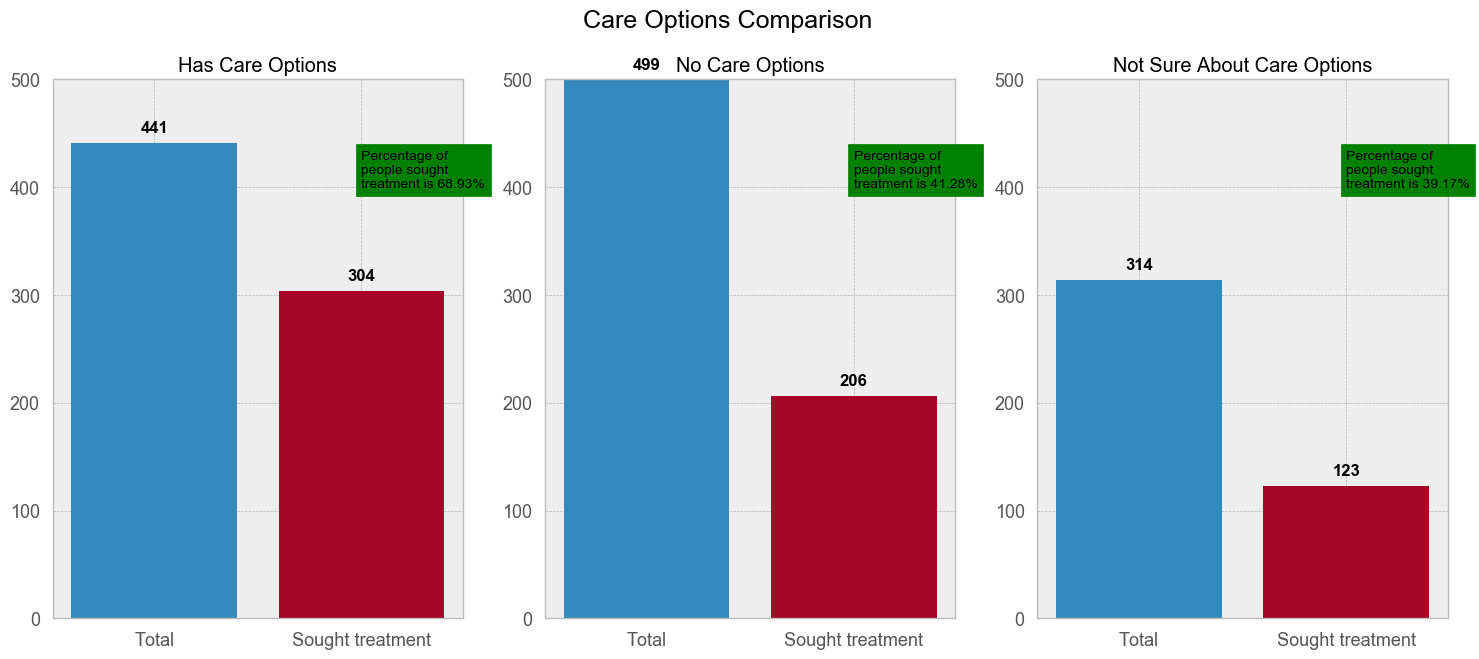

In [249]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 500])

care_yes=transformed_df[transformed_df["care_options"]=="Yes"]
care_no=transformed_df[transformed_df["care_options"]=="No"]
care_not_sure=transformed_df[transformed_df["care_options"]=="Not sure"]

treated_yes=care_yes[care_yes["treatment"]=="Yes"]
treated_no=care_no[care_no["treatment"]=="Yes"]
treated_not_sure=care_not_sure[care_not_sure["treatment"]=="Yes"]

ax1.bar("Total", len(care_yes))
ax1.bar("Sought treatment", len(treated_yes))

ax2.bar("Total", len(care_no))
ax2.bar("Sought treatment", len(treated_no))

ax3.bar("Total", len(care_not_sure))
ax3.bar("Sought treatment", len(treated_not_sure))

for ax in [ax1, ax2, ax3]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Has Care Options")
ax2.set(title="No Care Options")
ax3.set(title="Not Sure About Care Options")

ax1.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(care_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(care_no))*100:.2f}%",backgroundcolor="green")
ax3.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_not_sure)/len(care_not_sure))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Care Options Comparison", fontsize=18, fontweight=12)
plt.show()


These graphs discuss the feature `care_options`

### This feature is very similar to benefits feature, so discussion on this won't be done

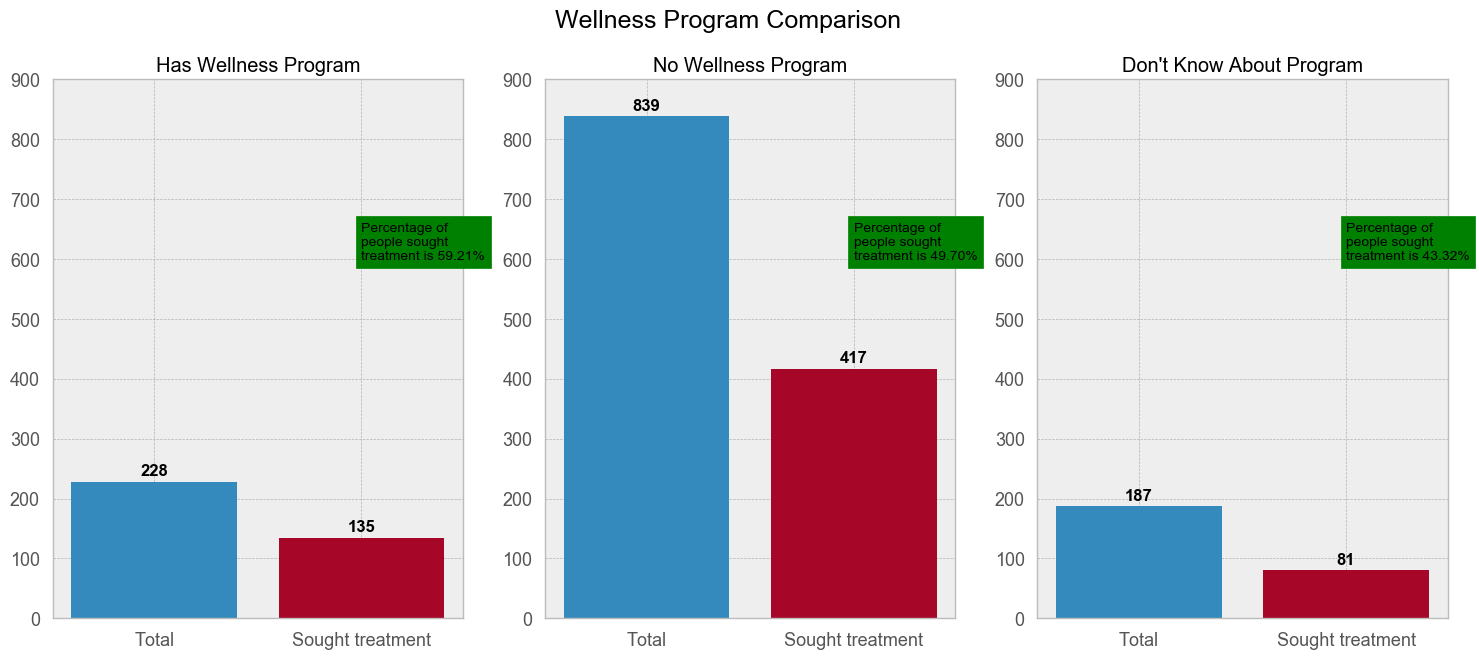

In [250]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 900])

wellness_yes=transformed_df[transformed_df["wellness_program"]=="Yes"]
wellness_no=transformed_df[transformed_df["wellness_program"]=="No"]
wellness_dk=transformed_df[transformed_df["wellness_program"]=="Don't know"]

treated_yes=wellness_yes[wellness_yes["treatment"]=="Yes"]
treated_no=wellness_no[wellness_no["treatment"]=="Yes"]
treated_dk=wellness_dk[wellness_dk["treatment"]=="Yes"]

ax1.bar("Total", len(wellness_yes))
ax1.bar("Sought treatment", len(treated_yes))

ax2.bar("Total", len(wellness_no))
ax2.bar("Sought treatment", len(treated_no))

ax3.bar("Total", len(wellness_dk))
ax3.bar("Sought treatment", len(treated_dk))

for ax in [ax1, ax2, ax3]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Has Wellness Program")
ax2.set(title="No Wellness Program")
ax3.set(title="Don't Know About Program")

ax1.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(wellness_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(wellness_no))*100:.2f}%",backgroundcolor="green")
ax3.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_dk)/len(wellness_dk))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Wellness Program Comparison", fontsize=18, fontweight=12)
plt.show()


The feature `wellness_program` answers whether the employer has ever discussed mental health as part of an employee wellness program?

* Around 18% of the people say yes, but surprisingly 67% people say that there aren't any wellness programs provided by their company
* Among the majority of people that said no, around half (50%) want to get medical treatment

### Hence, this feature has a moderate effect on whether the employees will undergo treatment or not

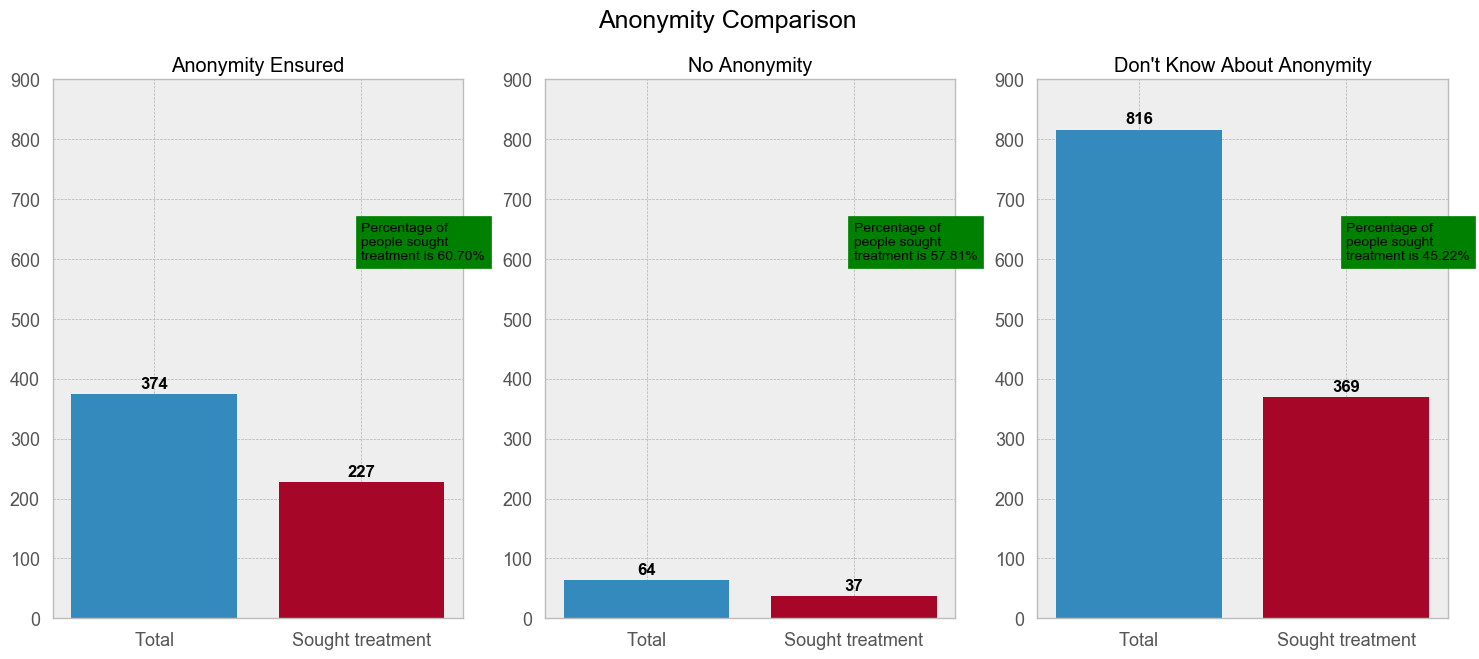

In [255]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 900])

anon_yes=transformed_df[transformed_df["anonymity"]=="Yes"]
anon_no=transformed_df[transformed_df["anonymity"]=="No"]
anon_dk=transformed_df[transformed_df["anonymity"]=="Don't know"]

treated_yes=anon_yes[anon_yes["treatment"]=="Yes"]
treated_no=anon_no[anon_no["treatment"]=="Yes"]
treated_dk=anon_dk[anon_dk["treatment"]=="Yes"]

ax1.bar("Total", len(anon_yes))
ax1.bar("Sought treatment", len(treated_yes))

ax2.bar("Total", len(anon_no))
ax2.bar("Sought treatment", len(treated_no))

ax3.bar("Total", len(anon_dk))
ax3.bar("Sought treatment", len(treated_dk))

for ax in [ax1, ax2, ax3]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Anonymity Ensured")
ax2.set(title="No Anonymity")
ax3.set(title="Don't Know About Anonymity")

ax1.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(anon_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(anon_no))*100:.2f}%",backgroundcolor="green")
ax3.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_dk)/len(anon_dk))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Anonymity Comparison", fontsize=18, fontweight=12)
plt.show()


The `anonymity` feature answers the question whether the respondents will remain anonymous if they choose to take advantage of mental health treatment

* Around 65% of the people were not aware whether anonymity was provided to them and 30% said yes to the provision of anonymity by the company.
* We can see that around 60% of people who answered 'Yes' sought treatment regarding their medical condition
* Also, the people who dont know about anonymity have less chance of seeking treatment

### Thus, anonymity might play a role in predicting whether or not a person seeks treatment

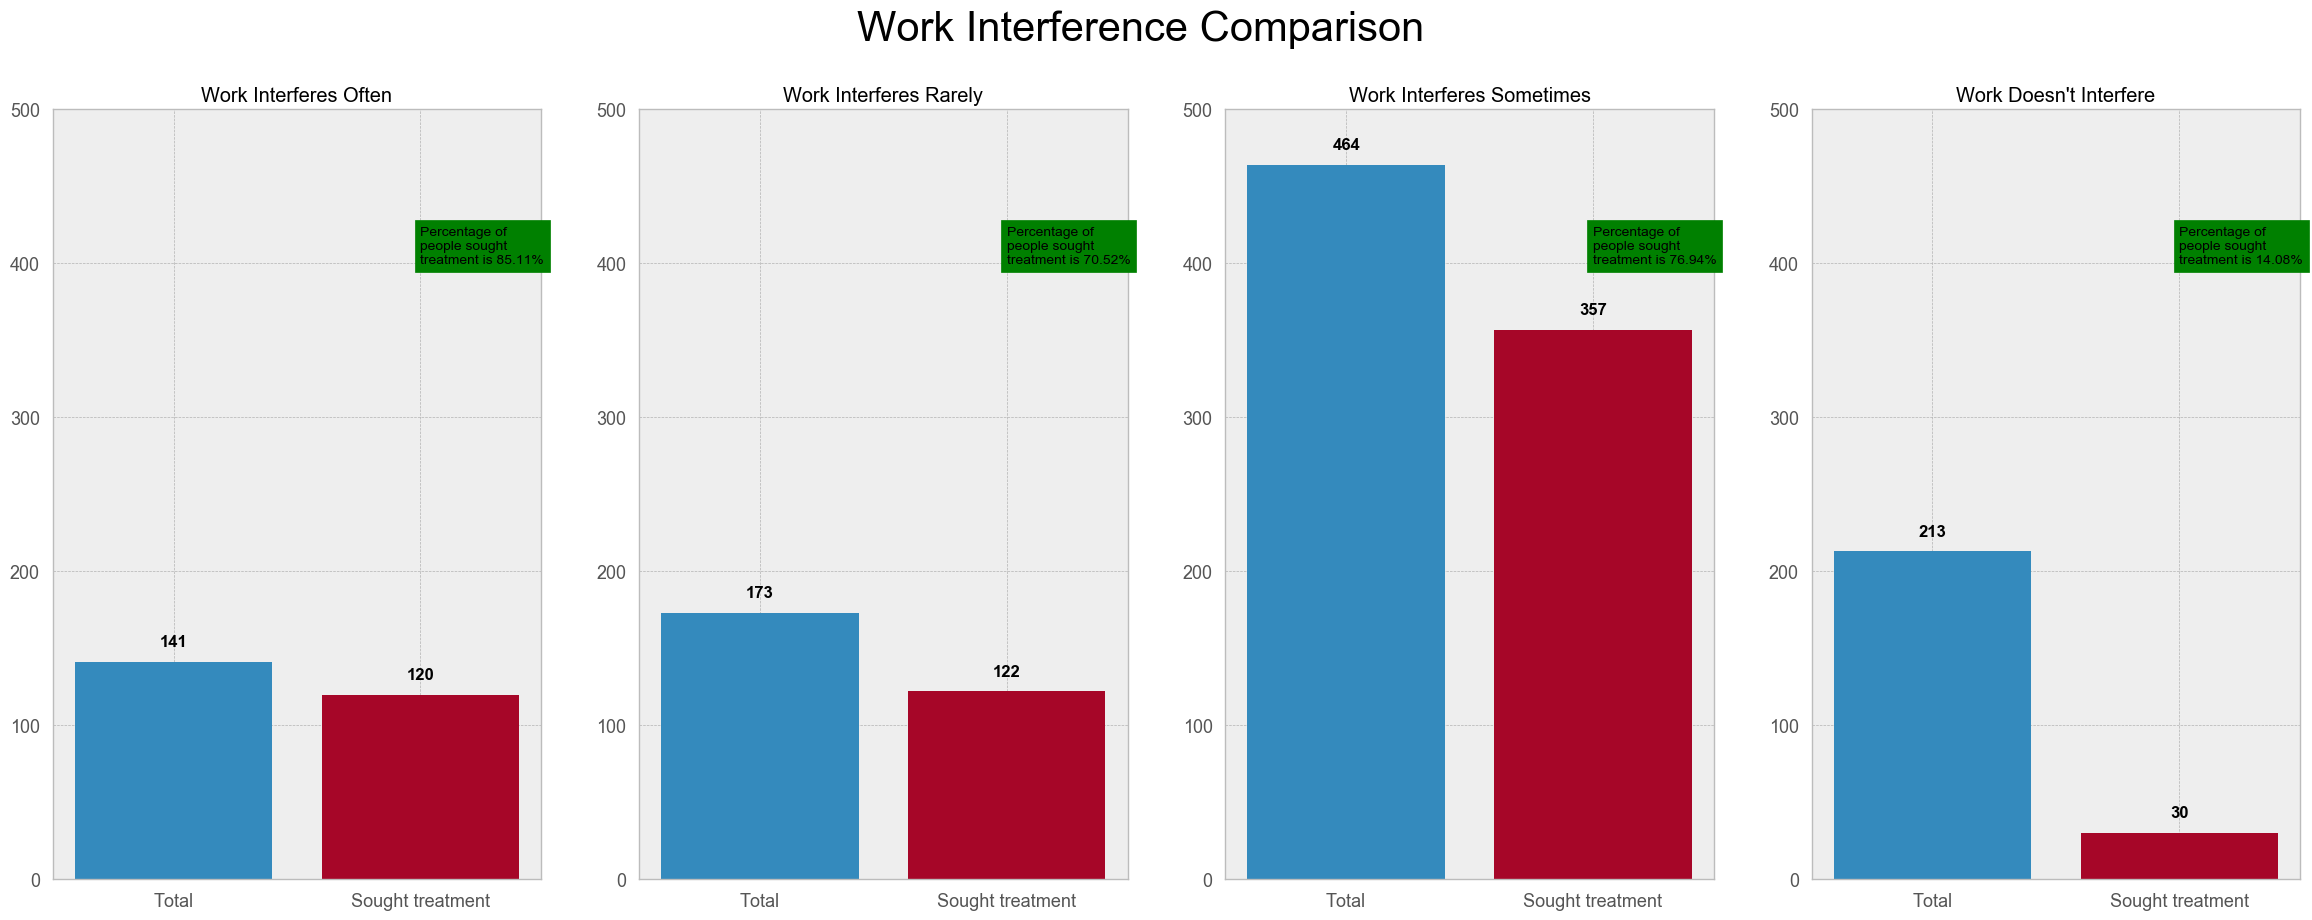

In [261]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(29, 10))
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim([0, 500])

interfere_often = transformed_df[transformed_df["work_interfere"] == "Often"]
interfere_rarely = transformed_df[transformed_df["work_interfere"] == "Rarely"]
interfere_sometimes = transformed_df[transformed_df["work_interfere"] == "Sometimes"]
interfere_never = transformed_df[transformed_df["work_interfere"] == "Never"]

treated_often = interfere_often[interfere_often["treatment"] == "Yes"]
treated_rarely = interfere_rarely[interfere_rarely["treatment"] == "Yes"]
treated_sometimes = interfere_sometimes[interfere_sometimes["treatment"] == "Yes"]
treated_never = interfere_never[interfere_never["treatment"] == "Yes"]

ax1.bar("Total", len(interfere_often))
ax1.bar("Sought treatment", len(treated_often))

ax2.bar("Total", len(interfere_rarely))
ax2.bar("Sought treatment", len(treated_rarely))

ax3.bar("Total", len(interfere_sometimes))
ax3.bar("Sought treatment", len(treated_sometimes))

ax4.bar("Total", len(interfere_never))
ax4.bar("Sought treatment", len(treated_never))

for ax in [ax1, ax2, ax3, ax4]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Work Interferes Often")
ax2.set(title="Work Interferes Rarely")
ax3.set(title="Work Interferes Sometimes")
ax4.set(title="Work Doesn't Interfere")

ax1.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_often)/len(interfere_often))*100:.2f}%", backgroundcolor="green")
ax2.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_rarely)/len(interfere_rarely))*100:.2f}%", backgroundcolor="green")
ax3.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_sometimes)/len(interfere_sometimes))*100:.2f}%", backgroundcolor="green")
ax4.text("Sought treatment", 400, f"Percentage of \npeople sought \ntreatment is {(len(treated_never)/len(interfere_never))*100:.2f}%", backgroundcolor="green")

plt.suptitle("Work Interference Comparison", fontsize=30, fontweight=12)
plt.show()


The `work_interfere` feature asks the question 'If you have a mental health condition, do you feel that it interferes with your work?'

* It is obvious from the graph that maximum number of people state that their mental health only sometimes affects their work
* We can see that 85% of people seek treatment if work interferes often
* It is however surprising that people who come under the 'Rarely' category also seek treatment 70% of the times, whereas people coming under 'Sometimes' seek treatment around 77% of the times

### Thus, this feature might be of huge importance to the classifier model

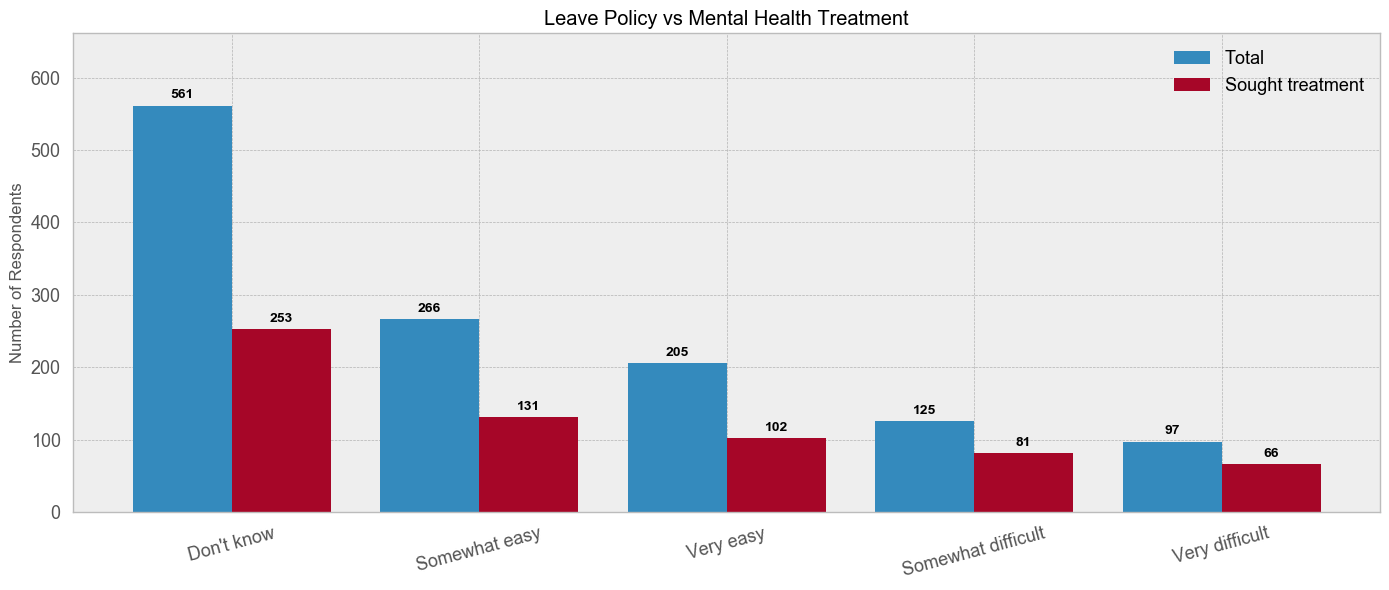

In [262]:
import matplotlib.pyplot as plt

categories = [
    "Don't know", 
    "Somewhat easy", 
    "Very easy", 
    "Somewhat difficult", 
    "Very difficult"
]

total_counts = [len(transformed_df[transformed_df["leave"] == cat]) for cat in categories]
treated_counts = [len(transformed_df[(transformed_df["leave"] == cat) & (transformed_df["treatment"] == "Yes")]) for cat in categories]

x = range(len(categories))
bar_width = 0.4

plt.figure(figsize=(14, 6))
plt.bar([i - bar_width/2 for i in x], total_counts, width=bar_width, label="Total")
plt.bar([i + bar_width/2 for i in x], treated_counts, width=bar_width, label="Sought treatment")

for i in x:
    plt.text(i - bar_width/2, total_counts[i] + 10, str(total_counts[i]), ha='center', fontsize=10, weight='bold')
    plt.text(i + bar_width/2, treated_counts[i] + 10, str(treated_counts[i]), ha='center', fontsize=10, weight='bold')

plt.xticks(x, categories, rotation=15)
plt.ylim([0, max(total_counts) + 100])
plt.ylabel("Number of Respondents")
plt.title("Leave Policy vs Mental Health Treatment")
plt.legend()
plt.tight_layout()
plt.show()


The `leave` feature answers the question 'How easy is it for you to take medical leave for a mental health condition?'

* While close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
* A small percent of people ( around 8% ) said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
* Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.

### The ease of taking a leave might be a good feature

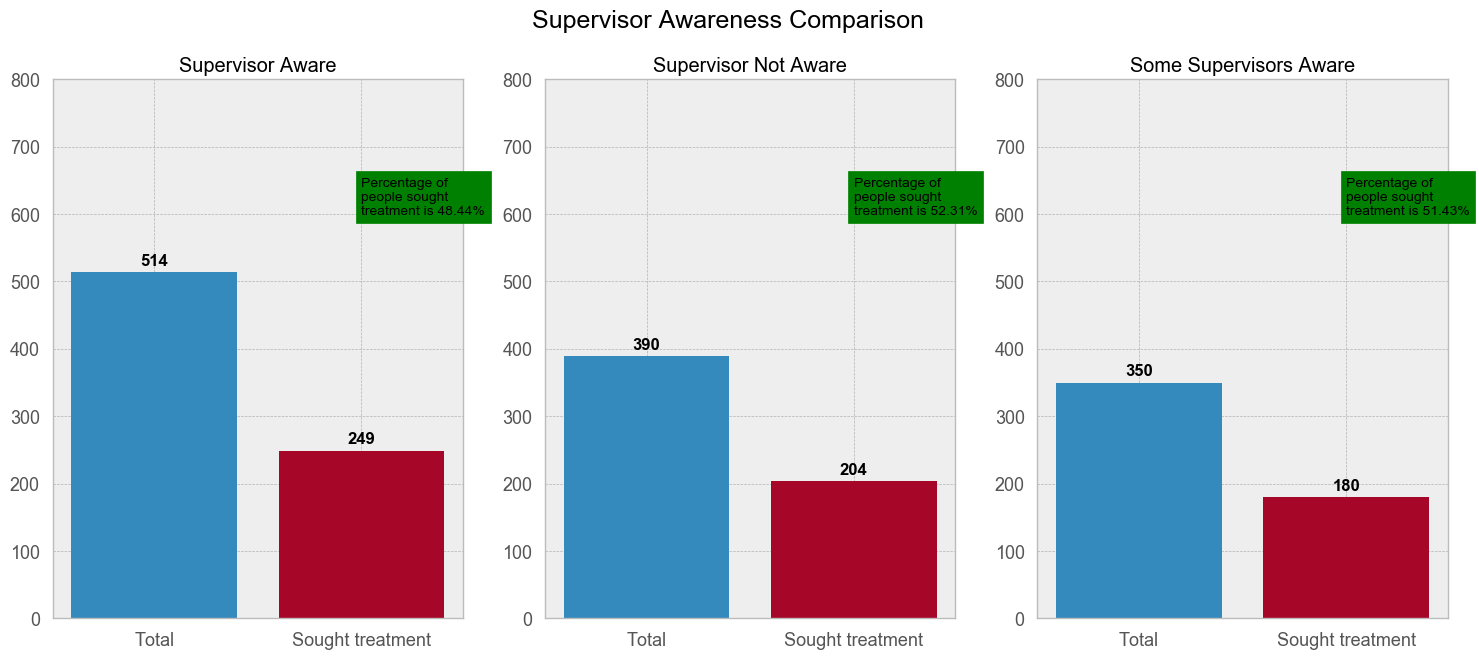

In [263]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 800])

sup_yes = transformed_df[transformed_df["supervisor"] == "Yes"]
sup_no = transformed_df[transformed_df["supervisor"] == "No"]
sup_some = transformed_df[transformed_df["supervisor"] == "Some of them"]

treated_yes = sup_yes[sup_yes["treatment"] == "Yes"]
treated_no = sup_no[sup_no["treatment"] == "Yes"]
treated_some = sup_some[sup_some["treatment"] == "Yes"]

ax1.bar("Total", len(sup_yes))
ax1.bar("Sought treatment", len(treated_yes))

ax2.bar("Total", len(sup_no))
ax2.bar("Sought treatment", len(treated_no))

ax3.bar("Total", len(sup_some))
ax3.bar("Sought treatment", len(treated_some))

for ax in [ax1, ax2, ax3]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,  
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Supervisor Aware")
ax2.set(title="Supervisor Not Aware")
ax3.set(title="Some Supervisors Aware")

ax1.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(sup_yes))*100:.2f}%",backgroundcolor="green")
ax2.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(sup_no))*100:.2f}%",backgroundcolor="green")
ax3.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_some)/len(sup_some))*100:.2f}%",backgroundcolor="green")

plt.suptitle("Supervisor Awareness Comparison", fontsize=18, fontweight=12)
plt.show()


The `supervisor` feature answers the question 'Would you be willing to discuss a mental health issue with your direct supervisor(s)?'

* Around 40% of the people say yes, 30% say no.
* However, it is equally likely for people to seek treatment in all of the three categories.

### Hence, this feature might not really be of use to the model

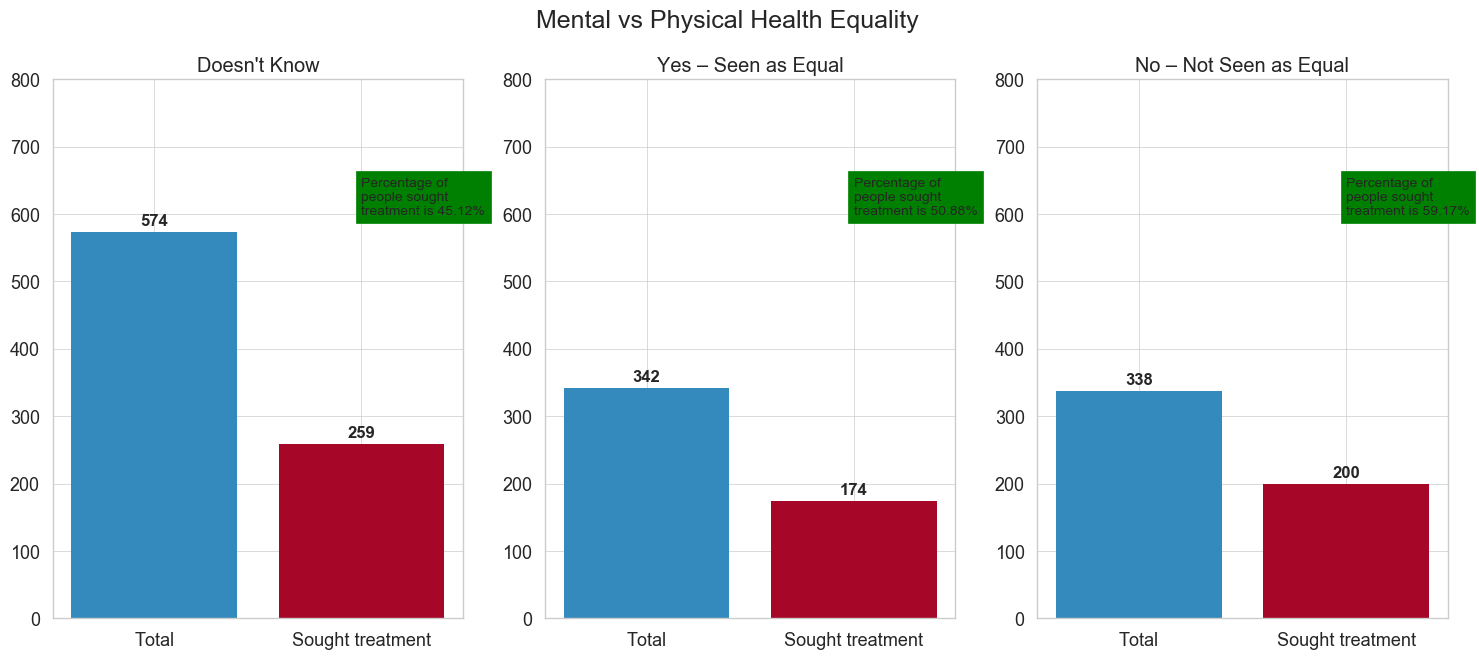

In [267]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0, 800])

mvp_dk = transformed_df[transformed_df["mental_vs_physical"] == "Don't know"]
mvp_yes = transformed_df[transformed_df["mental_vs_physical"] == "Yes"]
mvp_no = transformed_df[transformed_df["mental_vs_physical"] == "No"]

treated_dk = mvp_dk[mvp_dk["treatment"] == "Yes"]
treated_yes = mvp_yes[mvp_yes["treatment"] == "Yes"]
treated_no = mvp_no[mvp_no["treatment"] == "Yes"]

ax1.bar("Total", len(mvp_dk))
ax1.bar("Sought treatment", len(treated_dk))

ax2.bar("Total", len(mvp_yes))
ax2.bar("Sought treatment", len(treated_yes))

ax3.bar("Total", len(mvp_no))
ax3.bar("Sought treatment", len(treated_no))

for ax in [ax1, ax2, ax3]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Doesn't Know")
ax2.set(title="Yes – Seen as Equal")
ax3.set(title="No – Not Seen as Equal")

ax1.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_dk)/len(mvp_dk))*100:.2f}%", backgroundcolor="green")
ax2.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(mvp_yes))*100:.2f}%", backgroundcolor="green")
ax3.text("Sought treatment", 600, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(mvp_no))*100:.2f}%", backgroundcolor="green")

plt.suptitle("Mental vs Physical Health Equality", fontsize=18, fontweight=12)
plt.show()


The `mental_vs_physical` feature answers the question 'Do you feel that your employer takes mental health as seriously as physical health?'

* This is an interesting category, as the people who said 'No' were actually more likely (at 60%) to seek medical treatment for mental health
* People who don't know are 45% likely to seek treatment

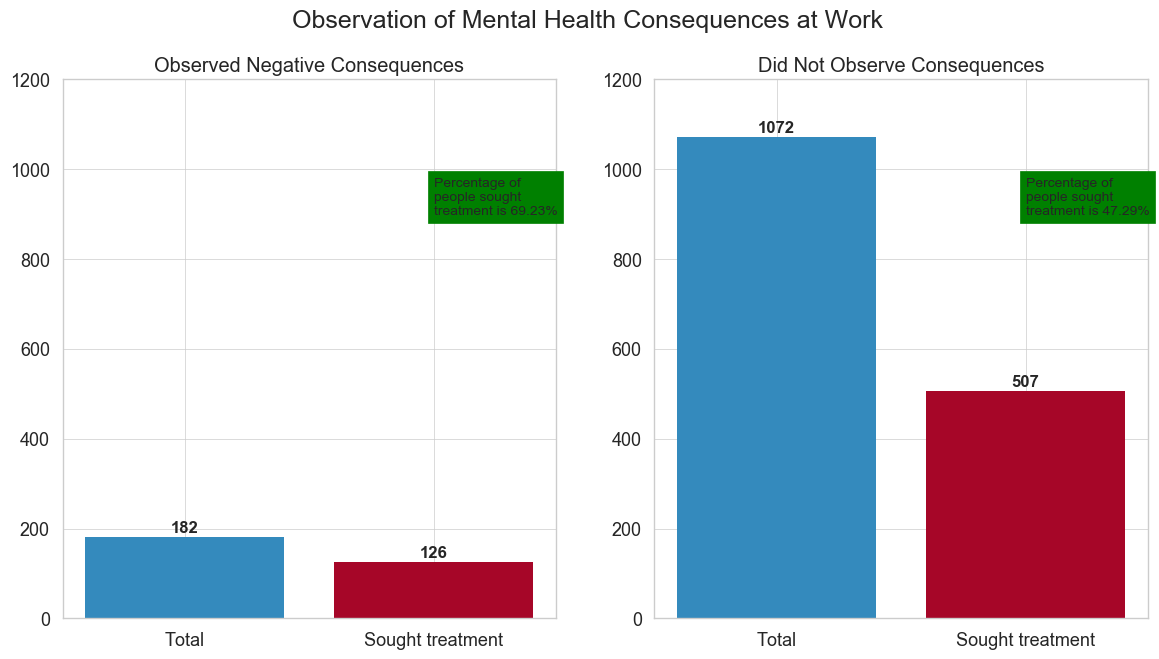

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
for ax in [ax1, ax2]:
    ax.set_ylim([0, 1200])

obs_yes = transformed_df[transformed_df["obs_consequence"] == "Yes"]
obs_no = transformed_df[transformed_df["obs_consequence"] == "No"]

treated_yes = obs_yes[obs_yes["treatment"] == "Yes"]
treated_no = obs_no[obs_no["treatment"] == "Yes"]

ax1.bar("Total", len(obs_yes))
ax1.bar("Sought treatment", len(treated_yes))

ax2.bar("Total", len(obs_no))
ax2.bar("Sought treatment", len(treated_no))

for ax in [ax1, ax2]:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,
            int(height),
            ha='center',
            fontsize=12,
            weight='bold'
        )

ax1.set(title="Observed Negative Consequences")
ax2.set(title="Did Not Observe Consequences")

ax1.text("Sought treatment", 900, f"Percentage of \npeople sought \ntreatment is {(len(treated_yes)/len(obs_yes))*100:.2f}%", backgroundcolor="green")
ax2.text("Sought treatment", 900, f"Percentage of \npeople sought \ntreatment is {(len(treated_no)/len(obs_no))*100:.2f}%", backgroundcolor="green")

plt.suptitle("Observation of Mental Health Consequences at Work", fontsize=18, fontweight=12)
plt.show()


The `obs_consequence` feature answers the question 'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'

* Majority of the people answered No to this question.

## THIS WRAPS UP EDA, LETS MAKE A CORRELATION MATRIX TO UNDESTAND THE CORRELATION OF VARIOUS FEATURES WITH THE TARGET VARIABLE

In [272]:
main_df=transformed_df
main_df.to_csv("data/main.csv")

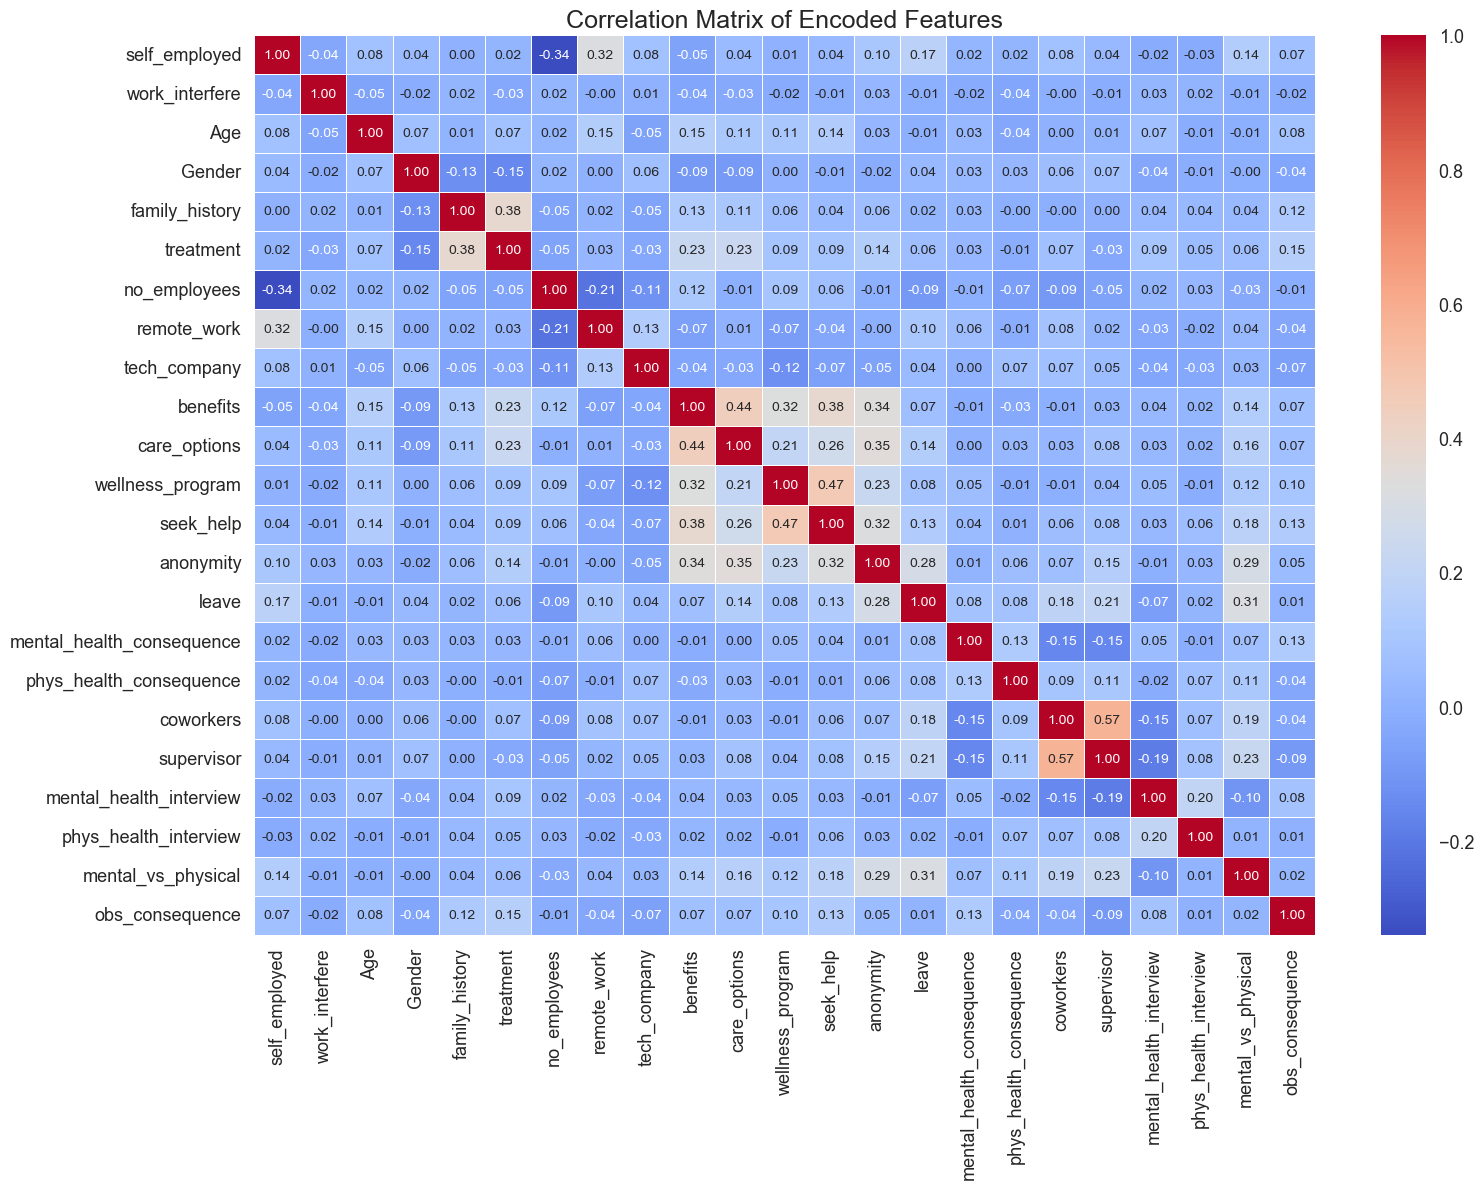

In [273]:
from sklearn.preprocessing import LabelEncoder

df_encoded = transformed_df.copy()

le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corr_matrix = df_encoded.corr()

# Step 4: Visualize it
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Encoded Features", fontsize=18)
plt.tight_layout()
plt.show()

In [274]:
target_corr = df_encoded.corr()["treatment"].drop("treatment").sort_values(key=abs, ascending=False)

print("Correlation of each feature with 'treatment':\n")
print(target_corr)

Correlation of each feature with 'treatment':

family_history               0.378069
care_options                 0.234806
benefits                     0.226160
obs_consequence              0.154541
Gender                      -0.150425
anonymity                    0.142462
mental_health_interview      0.094744
wellness_program             0.092486
seek_help                    0.090009
Age                          0.074747
coworkers                    0.069946
mental_vs_physical           0.061378
leave                        0.059826
phys_health_interview        0.051138
no_employees                -0.047002
supervisor                  -0.033276
work_interfere              -0.033119
tech_company                -0.032859
mental_health_consequence    0.027866
remote_work                  0.026919
self_employed                0.016564
phys_health_consequence     -0.013064
Name: treatment, dtype: float64


This shows how each feature correlates to the 'treatment' column